In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

In [2]:
# read in data
df = pd.read_table("../data/album_rankings.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# select all studio albums
albums = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'Folklore', 'Evermore', "Fearless (Taylor's Version)", "Red (Taylor's Version)", "Midnights"]
df = df[albums]

# set album colors
album_colors = {
    'Taylor Swift': '#4BA1C7',
    'Fearless': '#d4af37',
    '1989': '#9f45ff',
    'Red': '#a71f1f',
    'reputation': '#000000',
    'Midnights': '#00006d', #73a2b3
    'Folklore': '#838383',
    'Evermore': '#114611', #r:200, g:103, b:60
    "Red (Taylor's Version)": '#c96464',
    'Speak Now': '#ff0389',
    'Lover': '#008bd1',
    "Fearless (Taylor's Version)": '#8c4e01'
}

# set shorter names
album_short = {'Taylor Swift': 'Taylor Swift',
                'Fearless': 'Fearless',
                'Speak Now': 'Speak Now',
                'Red': 'Red',
                '1989': '1989',
                'reputation': 'reputation',
                'Lover': 'Lover',
                'Folklore': 'Folklore',
                'Evermore': 'Evermore',
                "Fearless (Taylor's Version)": 'Fearless*',
                "Red (Taylor's Version)": 'Red*',
                'Midnights': 'Midnights'}

# get release dates (quick google search)
release_dates = {
    'Taylor Swift': pd.Timestamp('2006-10-24'),
    'Fearless': pd.Timestamp('2008-11-24'),
    'Speak Now': pd.Timestamp('2010-10-25'),
    'Red': pd.Timestamp('2012-10-22'),
    '1989': pd.Timestamp('2014-10-27'),
    'reputation': pd.Timestamp('2017-11-10'),
    'Lover': pd.Timestamp('2019-08-23'),
    'Folklore': pd.Timestamp('2020-07-24'),
    'Evermore': pd.Timestamp('2020-12-11'),
    "Fearless (Taylor's Version)": pd.Timestamp('2021-04-09'),
    "Red (Taylor's Version)": pd.Timestamp('2021-11-12'),
    "Midnights": pd.Timestamp('2022-10-21')
}

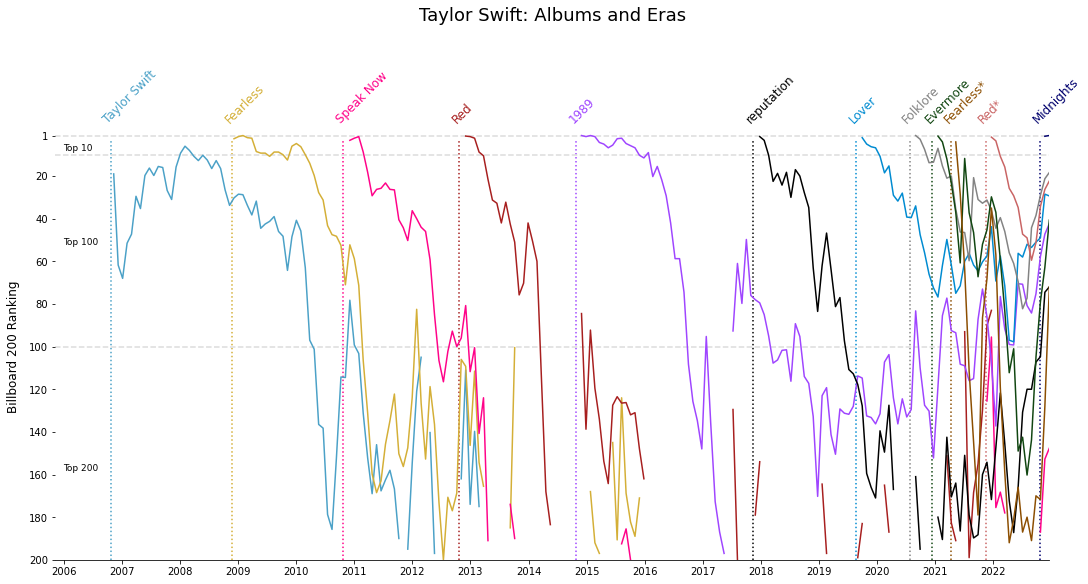

In [8]:
# make the plot
fig, ax = plt.subplots(figsize=(15,8), constrained_layout=True)

# get average by week
df_resample = df.resample("4W").mean()

# plot line, label, and data for each album

for album in albums:
    ax.plot(df_resample[[album]], color = album_colors[album])
for album in albums:
    ax.axvline(release_dates[album], color = album_colors[album], linestyle=':', zorder = 1, ymax = 0.79)
    ax.annotate(album_short[album], xy=(release_dates[album] - timedelta(days=60), -5), color = album_colors[album], fontsize=12, rotation=45)

# set end date
end = release_dates['Taylor Swift'] - timedelta(days=350)

# set grid
lines = [1, 10, 100]
labels = ['Top 10', 'Top 100', 'Top 200']
distance = [8, 52, 158]

for i in range(len(labels)):
    ax.annotate(labels[i], xy = (end + timedelta(days=50), distance[i]), color='black', fontsize=9)
for line in lines:
    ax.axhline(line, color='gainsboro', linestyle='dashed', zorder = 1)

# format x axis
plt.xlim([end, df_resample.index.max()])
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# format y axis
plt.ylim([-50, 200])
ax.invert_yaxis()
ax.set_yticks([1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
ax.set_ylabel("Billboard 200 Ranking", fontsize=12)
ax.yaxis.set_label_coords(-.035, .4)

# format title
plt.title("Taylor Swift: Albums and Eras", fontsize=18)

# format spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

fig.savefig("../../../stat386-projects/stat386-projects/assets/figures/my_plot.png", dpi = 600)

plt.show()